In [49]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import plotly as py 
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

READ FILE

In [50]:
path = 'googleplaystore.csv'
df = pd.read_csv(path)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Null values or missing data


In [51]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [52]:
## Delete all rows containing missing values
df.dropna(how='any', inplace= True)

In [53]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Gain insights into RATING 

In [54]:
df['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of RATING')

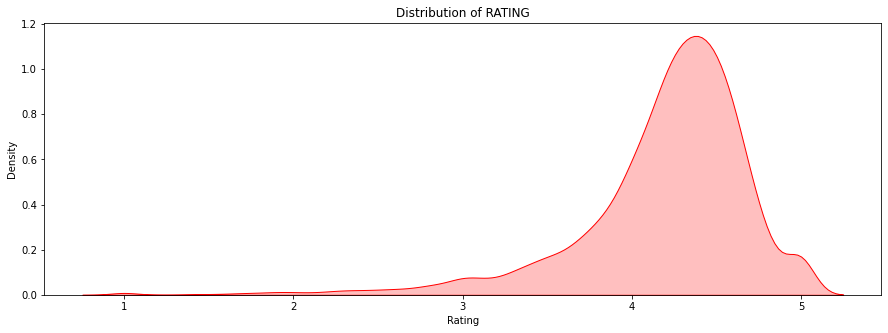

In [55]:
## DISTRIBUTION OF RATING 
plt.figure(figsize = (15,5))
g = sns.kdeplot(df['Rating'], color='red', shade = True)
plt.title('Distribution of RATING')

CATEGORY

In [56]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

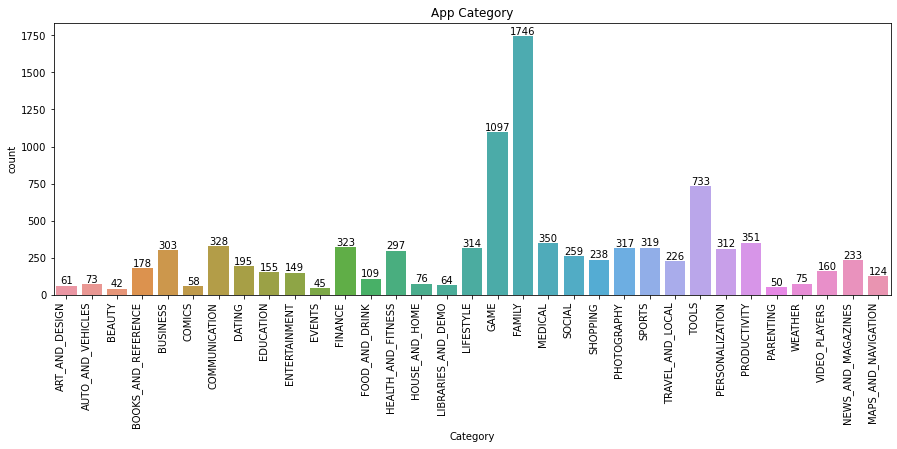

In [57]:
plt.figure(figsize = (15,5))
g = sns.countplot(x= 'Category', data= df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('App Category')

## ADDING DATA LABELS
for i, bar in enumerate(g.patches):
    h = bar.get_height()
    g.text(i, h+10, '{}'.format(int(h)), ha='center')
plt.show()

TYPE 

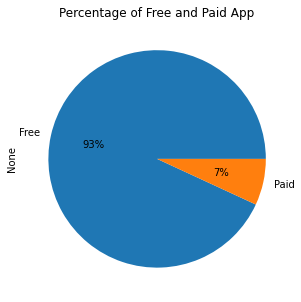

In [58]:
plt.figure( figsize = (15,5))
df.groupby(by=df['Type']).size().plot(kind='pie', autopct='%1.0f%%', title = 'Percentage of Free and Paid App')
plt.show()


CONTENT RATING

In [59]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

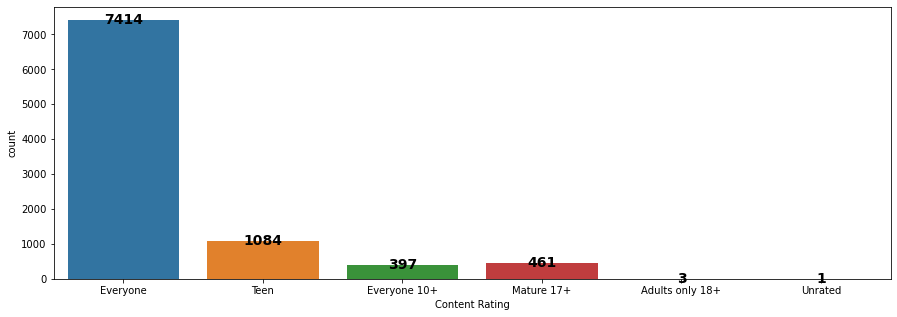

In [60]:
plt.figure(figsize = (15,5))
g = sns.countplot( x= 'Content Rating', data = df)

## ADD DATA LABELS
for i, bar in enumerate(g.patches):
    h = bar.get_height()
    g.text(i, h+10,'{}'.format(int(h)), ha='center', va='center',size =14, fontweight = 'bold')


SIZE

In [61]:
## Drop the term "M" 
df['Size'] = df['Size'].str.replace(r'M', '')
## Drop the term "k"
df['Size'] = df['Size'].str.replace(r'k', '')


In [95]:
## Change dtype to FLOAT 
df['Size'] = pd.to_numeric(df['Size'], downcast= 'float',errors='ignore')
## Drop the term 'Varies with device'
df['Size'].replace('Varies with device', np.nan, inplace = True )

## Drop rows with NaN values 
df = df.dropna()

In [91]:
df.Size.head()

0     19
1     14
2    8.7
3     25
4    2.8
Name: Size, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 720x720 with 0 Axes>

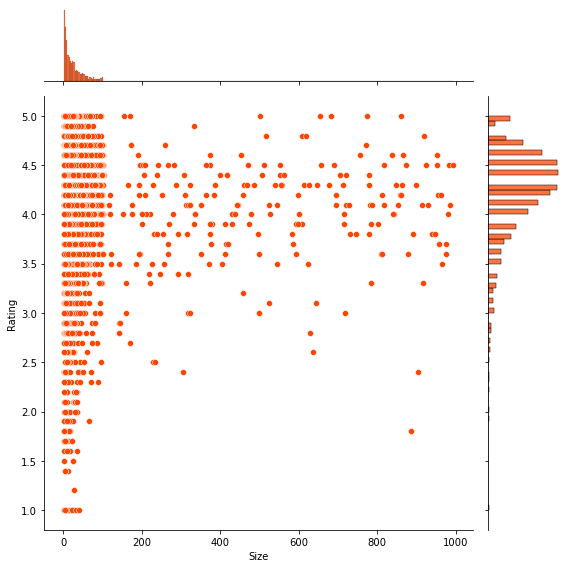

In [96]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data= df, size = 8);

PRICE

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
## Drop the sign '$' and convert dtype into float
df['Price'] = df['Price'].str.replace(r'$','').astype(float)


C:\Users\qvinh\AppData\Local\Temp/ipykernel_4272/3213139188.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [ ]:
df['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [ ]:
## Let's see what the app with the highest price 
df[df['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,"10,000+",Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


<Figure size 1080x720 with 0 Axes>

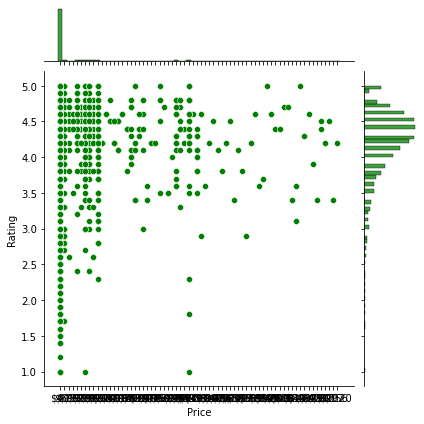

In [100]:
## PRICE VS RATING
plt.figure(figsize=(15,10))
g = sns.jointplot(x='Price', y='Rating', data=df, color='green')

VISUALIZE PRICE IN TYPE OF BAND

In [ ]:
df['Price'] = df['Price'].str.replace(r'$','').astype(float)
df.loc[df['Price']==0, 'Price Band'] = 'Free'

df.loc[(df['Price'] > 0) & (df['Price'] <= 0.99), 'Price Band'] = 'Cheap'

df.loc[(df['Price'] > 0.99) & (df['Price'] <= 4.99), 'Price Band'] = 'Affordable'

df.loc[(df['Price'] > 4.99) & (df['Price'] <= 10.99), 'Price Band'] = 'Expensive'

df.loc[df['Price'] > 10.99, 'Price Band'] = 'Costly'



In [114]:
df[['Price Band','Rating']].groupby(by='Price Band',as_index= False).mean()


,Price Band,Rating
0,Affordable,4.260580
1,Cheap,4.298095
2,Costly,4.174242
3,Expensive,4.216393
4,Free,4.167562


Text(0.5, 1.0, 'Rating range of each band')

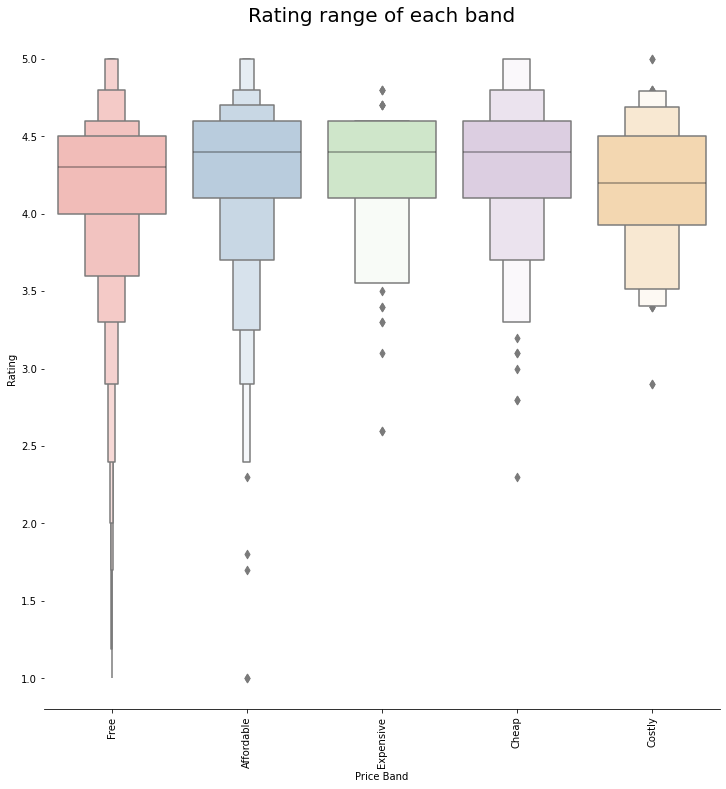

In [117]:
g = sns.catplot(x="Price Band",y="Rating",data=df, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Rating range of each band',size = 20)

RATING VS APP TYPE (FREE VS PAID)

In [119]:
df[['Type','Rating']].groupby(by='Type').mean()

,Rating
Type,
Free,4.167562
Paid,4.252860


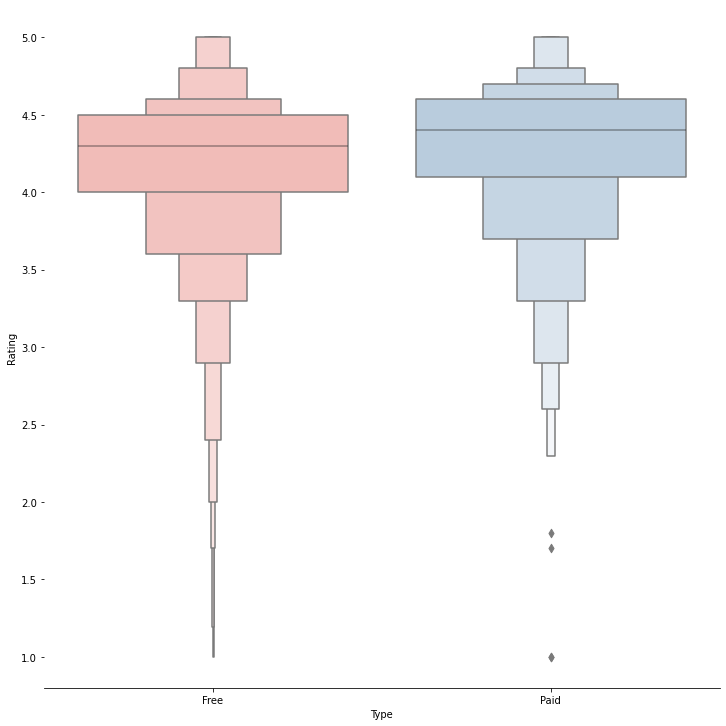

In [122]:
g = sns.catplot(x='Type', y ='Rating',data=df, kind='boxen',height = 10 ,palette = "Pastel1")
g.despine(left=True)